In [1]:
# imports
import torch 
from rouge import Rouge
import matplotlib.pyplot as plt

## ROUGE (Recall-Oriented Understudy for Gisting Evaluation)
Create a Performance Metric Visualization

In [2]:

generated_summary = '''your weeks of pregnancy are dated from the first day of your last period.this means that in the first 2 weeks or so, you are not actually pregnant – your body is preparing for ovulation (releasing an egg from one of your ovaries) as usual.your "getting pregnant" timeline is:day 1: the first day of your periodday 14 (or slightly before or after, depending how long your menstrual cycle is): you ovulatewithin 24 hours of ovulation, the egg is fertilised by sperm if you have had sex in the last few days without using contraceptionabout 5 to 6 days after ovulation, the fertilised egg burrows into the lining of the womb – this is called implantationyou're now pregnantfind out more about trying to get pregnant.you at 1 to 3 weeksthe first thing most women notice is that their period does not arrive.find out about the signs and symptoms of pregnancythe most reliable way of finding out if you're pregnant is to take a pregnancy test.once you think you could be pregnant, it's important to get in touch with a midwife or doctor to start your pregnancy (antenatal) care.you can do this by contacting:your gp surgery – if you're not registered with a gp, you can find a gpyour local hospital's maternity unit – find maternity servicesthings to think aboutin the early days blet, make sure the tablet does not contain vitamin a (or retinol).you can get vitamin supplements containing folic acid and vitamin d free of charge if you're under 18, pregnant or breastfeeding and qualify for the healthy start scheme.sign up for start4life's weekly emails for expert advice, videos and tips on pregnancy, birth and beyond.go to you and your baby at 4 weeks pregnant.'''    
new_generated_summary = '''In the first 2 weeks or so, you are not actually pregnant. Your body is preparing for ovulation (releasing an egg from one of your ovaries) as usual. The most reliable way of finding out if you're pregnant is to take a pregnancy test.'''
reference_summary = '''Pregnancy is dated from the first day of last period. Meaning in the first two weeks you are not pregnant, but instead preparing for ovulation. The getting pregnant timeline varies from 1-3 weeks. You should take a pregnancy test and then see a midwife or doctor to start your pregnancy or antenatal care. You should think about a few things first. Early days, you may not know about your pregnany but you should take folic acid supplements, vitamin D, avoid potential infections, and stop smoking. Sign up for Start4Life's weekly emails for expert advice.'''

In [3]:
def RougeMetric(generated_summary, reference_summary, title):
    rouge = Rouge()
    scores = rouge.get_scores(generated_summary, reference_summary)
    
    print(scores)
  
    metrics = list(scores[0].keys())
    recall = [scores[0][m]['r'] for m in metrics]
    precision = [scores[0][m]['p'] for m in metrics]
    f1_score = [scores[0][m]['f'] for m in metrics]

    # Plotting the ROUGE scores
    plt.figure(figsize=(10, 6))

    plt.plot(metrics, recall, marker='o', label='Recall', color='darkviolet')
    plt.plot(metrics, precision, marker='o', label='Precision', color='crimson')
    plt.plot(metrics, f1_score, marker='o', label='F1 Score', color='skyblue')

    # Highlighting key metrics
    best_metric = metrics[f1_score.index(max(f1_score))]
    best_f1_score = max(f1_score)
    plt.annotate(f'Best F1 Score: {best_f1_score:.3f}', xy=(best_metric, best_f1_score), xytext=(-30, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

    # Adding labels and title
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams.update({'font.size': 18})
    plt.xlabel('ROUGE Metric',fontsize=18)
    plt.ylabel('Score',fontsize=18)
    plt.title(f'{title} Performance of ROUGE Metric')
    plt.legend(fontsize=18)

    plt.grid(True)
    plt.tight_layout()
    plt.show()


[{'rouge-1': {'r': 0.5833333333333334, 'p': 0.2413793103448276, 'f': 0.3414634104937538}, 'rouge-2': {'r': 0.28888888888888886, 'p': 0.09352517985611511, 'f': 0.14130434413102563}, 'rouge-l': {'r': 0.5555555555555556, 'p': 0.22988505747126436, 'f': 0.32520324789212773}}]


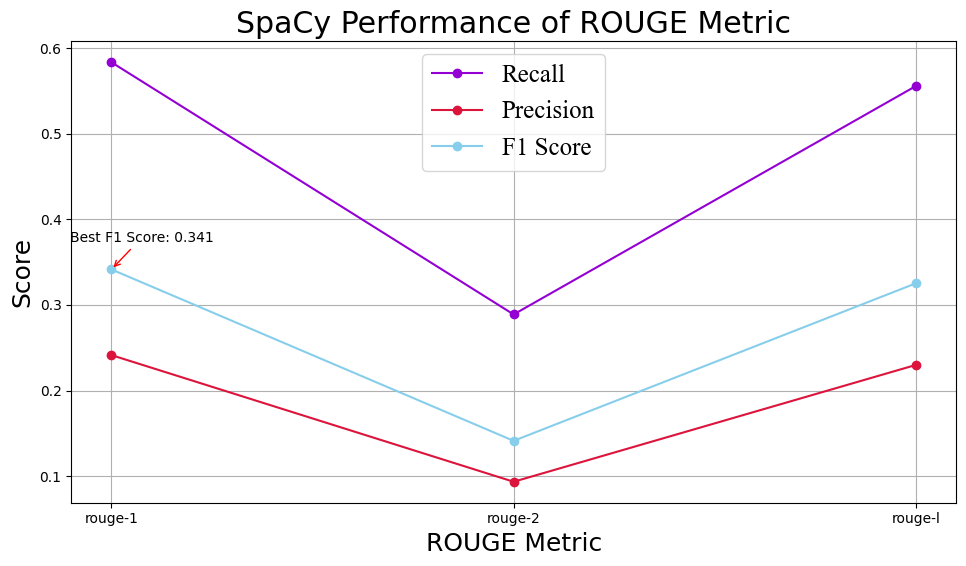

[{'rouge-1': {'r': 0.2916666666666667, 'p': 0.5121951219512195, 'f': 0.3716814113055056}, 'rouge-2': {'r': 0.08888888888888889, 'p': 0.18604651162790697, 'f': 0.12030074750409876}, 'rouge-l': {'r': 0.2777777777777778, 'p': 0.4878048780487805, 'f': 0.3539822962612578}}]


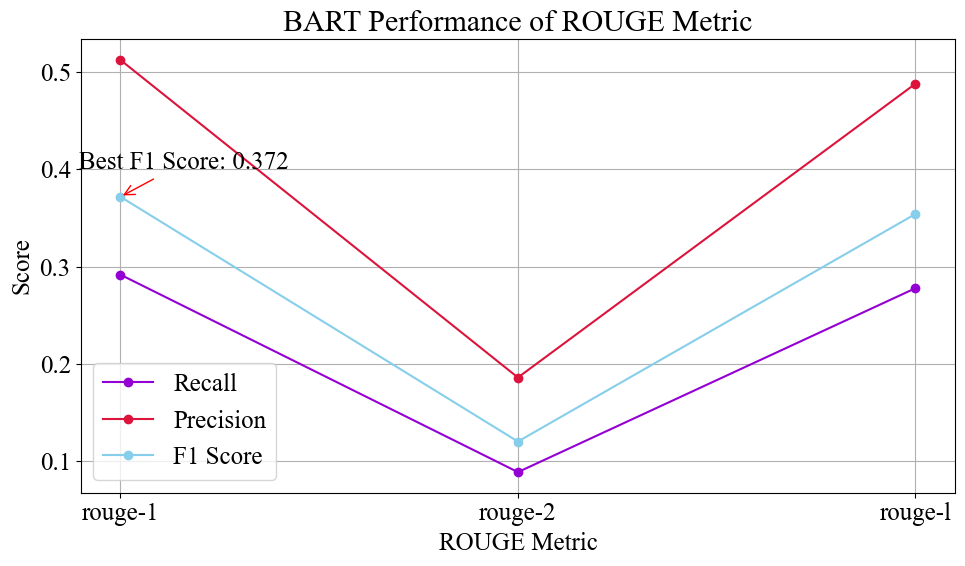

In [4]:
RougeMetric(generated_summary, reference_summary, 'SpaCy')
RougeMetric(new_generated_summary, reference_summary, 'BART')